<a href="https://colab.research.google.com/github/Nemit-jindal/ML_Anomaly_Detection/blob/main/AnomalyDetection_using_LocalOutlierFactor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_moons

x,y=make_moons(n_samples=300,noise=0.1)

In [3]:
x,y

(array([[ 1.81575946, -0.10256637],
        [ 0.53199667, -0.42275392],
        [ 1.07662798, -0.43792966],
        [-0.07365757,  0.3380578 ],
        [ 0.00759391,  0.27694407],
        [ 0.42287669, -0.04093455],
        [-0.37964368,  0.66572338],
        [ 0.81242795,  0.55695422],
        [ 0.69186055, -0.47553514],
        [ 0.88657295,  0.56452804],
        [ 1.50738856, -0.20484693],
        [-0.30900924,  0.94861909],
        [ 0.91614507,  0.03011111],
        [-0.85661192,  0.37778126],
        [-0.54411927,  0.85517479],
        [ 1.14692446, -0.7532308 ],
        [-0.48891804,  0.51723122],
        [ 1.12283291, -0.47964862],
        [-0.86280557,  0.62130914],
        [-0.1111494 ,  1.01096447],
        [ 0.2430393 ,  0.87890644],
        [-0.11098756,  1.03627013],
        [-0.46980638,  0.83322566],
        [ 1.17229686, -0.56011493],
        [ 0.20101807, -0.15432596],
        [ 0.89254143,  0.35402095],
        [ 1.69791529, -0.25227874],
        [ 1.96136411,  0.105

In [4]:
x_outliers=np.random.uniform(low=-3,high=3,size=(20,2))
x=np.vstack((x,x_outliers))

In [5]:
x

array([[ 1.81575946, -0.10256637],
       [ 0.53199667, -0.42275392],
       [ 1.07662798, -0.43792966],
       [-0.07365757,  0.3380578 ],
       [ 0.00759391,  0.27694407],
       [ 0.42287669, -0.04093455],
       [-0.37964368,  0.66572338],
       [ 0.81242795,  0.55695422],
       [ 0.69186055, -0.47553514],
       [ 0.88657295,  0.56452804],
       [ 1.50738856, -0.20484693],
       [-0.30900924,  0.94861909],
       [ 0.91614507,  0.03011111],
       [-0.85661192,  0.37778126],
       [-0.54411927,  0.85517479],
       [ 1.14692446, -0.7532308 ],
       [-0.48891804,  0.51723122],
       [ 1.12283291, -0.47964862],
       [-0.86280557,  0.62130914],
       [-0.1111494 ,  1.01096447],
       [ 0.2430393 ,  0.87890644],
       [-0.11098756,  1.03627013],
       [-0.46980638,  0.83322566],
       [ 1.17229686, -0.56011493],
       [ 0.20101807, -0.15432596],
       [ 0.89254143,  0.35402095],
       [ 1.69791529, -0.25227874],
       [ 1.96136411,  0.10573863],
       [ 1.50482788,

In [6]:
out=LocalOutlierFactor(n_neighbors=20,contamination=0.1)
y_pred=out.fit_predict(x)

In [7]:
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

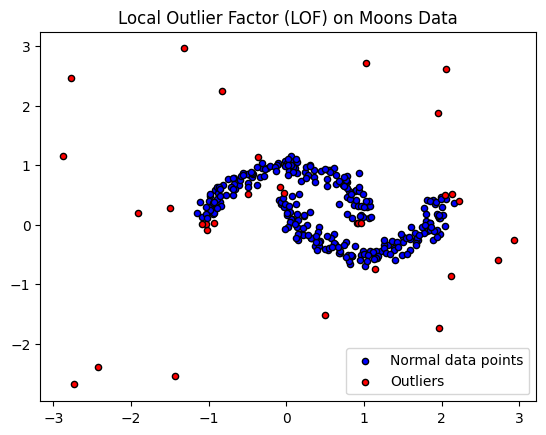

In [8]:
#separate normal data points>>inliers and outliers
x_inliners=x[y_pred==1]
x_outliers=x[y_pred==-1]

#plotting
plt.title("Local Outlier Factor (LOF) on Moons Data")
plt.scatter(x_inliners[:,0],x_inliners[:,1],color='b',s=20,edgecolors='k',label='Normal data points')
plt.scatter(x_outliers[:,0],x_outliers[:,1],color='r',s=20,edgecolors='k',label='Outliers')
plt.legend()
plt.show()